In [1]:
# Chapter5 Biophysical ML
# we will explore in depth the problem of predicting how
# small drug-like molecules bind to a protein of interest in the human body.

In [2]:
# Our goal therefore is to design learning algorithms that can effectively predict when a
# given molecule is going to interact with a given protein. How can we do this?

In [3]:
#

In [4]:
##setup tensorflow v1
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
## this will install anaconda and deepchem, will add path, execution will take sometime

!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-07-24 21:33:11--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   206MB/s    in 2.5s    

2020-07-24 21:33:14 (206 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=py37_0
    - anacond

In [6]:
############## check deepchem installation by 
import deepchem as dc
dc.__version__ #should match with the installed

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



'2.3.0'

In [10]:
#need to reinstall deepchem bcz of an openmm error

In [11]:
!curl -Lo deepchem_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3477  100  3477    0     0   9125      0 --:--:-- --:--:-- --:--:--  9125


In [12]:
import deepchem_installer

In [13]:
%time deepchem_installer.install(additional_packages=['mdtraj'], version='2.3.0')

add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing deepchem
done
deepchem-2.3.0 installation finished!


CPU times: user 318 ms, sys: 139 ms, total: 457 ms
Wall time: 2min 4s


In [14]:
import deepchem as dc

In [15]:
grid_featurizer = dc.feat.RdkitGridFeaturizer(voxel_width=2.0,feature_types=['hbond', 'salt_bridge', 'pi_stack',
'cation_pi', 'ecfp', 'splif'], sanitize=True, flatten=True)

In [8]:
# do not really need to use this, feature parameter 
# in the next function will take care of it

In [ ]:
#pdbbind dataset is large ~ 2GB, takes time

In [17]:
# bcz of an openmm error, I have to manually download
import deepchem as dc
from deepchem.utils import download_url

import os

data_dir = dc.utils.get_data_dir()
dataset_file = os.path.join(data_dir, "pdbbind_core_df.csv.gz")

if not os.path.exists(dataset_file):
    print('File does not exist. Downloading file...')
    download_url("https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/pdbbind_core_df.csv.gz")
    print('File downloaded...')

raw_dataset = dc.utils.save.load_from_disk(dataset_file)

File does not exist. Downloading file...
File downloaded...


In [19]:
#raw_dataset

In [20]:
grid_featurizer = dc.feat.RdkitGridFeaturizer(
    voxel_width=16.0, feature_types=["ecfp", "splif", "hbond", "pi_stack", "cation_pi", "salt_bridge"], 
    ecfp_power=5, splif_power=5, parallel=True, flatten=True, sanitize=True)

In [21]:
compound_featurizer = dc.feat.CircularFingerprint(size=128)

In [22]:
#load data
pdbbind_tasks, (train_dataset, valid_dataset, test_dataset), transformers = dc.molnet.load_pdbbind_grid(
    featurizer="ECFP", subset="refined")

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /tmp/refined_smiles_labels.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
TIMING: featurizing shard 0 took 8.847 s
TIMING: dataset construction took 8.969 s
Loading dataset from disk.
TIMING: dataset construction took 0.142 s
Loading dataset from disk.
TIMING: dataset construction took 0.073 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
TIMING: dataset construction took 0.116 s
Loading dataset from disk.
TIMING: dataset construction took 0.017 s
Loading dataset from disk.
TIMING: dataset construction took 0.020 s
Loading dataset from disk.


In [27]:
train_dataset.get_data_shape(),valid_dataset.get_data_shape(),test_dataset.get_data_shape()

((1024,), (1024,), (1024,))

In [28]:
# now comes model
from sklearn.ensemble import RandomForestRegressor

In [29]:
#RSF model
sklearn_model = RandomForestRegressor(n_estimators=100)
model = dc.models.SklearnModel(sklearn_model)
model.fit(train_dataset)

In [30]:
#MLP model
n_features = train_dataset.X.shape[1]
model_mlp = dc.models.MultitaskRegressor(n_tasks=len(pdbbind_tasks),n_features=n_features,
layer_sizes=[2000, 1000],dropouts=0.5,learning_rate=0.0003)
model_mlp.fit(train_dataset, nb_epoch=250)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.







0.10967135243117809

In [31]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

In [32]:
#checking the RF model
print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric], transformers)
test_scores = model.evaluate(test_dataset, [metric], transformers)
print("Train scores ", train_scores)
print("Test scores ", test_scores)

Evaluating model
computed_metrics: [0.8942385810221056]
computed_metrics: [0.5099649185226399]
Train scores  {'pearson_r2_score': 0.8942385810221056}
Test scores  {'pearson_r2_score': 0.5099649185226399}


In [33]:
#RF train r2: 0.89423
#RF test r2: 0.5099
#overfitting evident

In [34]:
#checking the MLP model
print("Evaluating model")
train_scores = model_mlp.evaluate(train_dataset, [metric], transformers)
test_scores = model_mlp.evaluate(test_dataset, [metric], transformers)
print("Train scores ", train_scores)
print("Test scores ", test_scores)

Evaluating model
computed_metrics: [0.9182871325333154]
computed_metrics: [0.3697259436991816]
Train scores  {'pearson_r2_score': 0.9182871325333154}
Test scores  {'pearson_r2_score': 0.3697259436991816}


In [35]:
#MLP train r2: 0.918
#MLP test r2: 0.369
#overfitting more than RF

In [36]:
#This is different than what the book says, in book RF is more ovefit

In [39]:
test_dataset.y.shape

(304, 1)

In [40]:
rf_predicted_test = model.predict(test_dataset)

In [42]:
rf_predicted_test.shape

(304,)

In [43]:
#plots
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt



In [53]:
rf_predicted_test = model.predict(test_dataset)
mlp_predicted_test = model_mlp.predict(test_dataset)
rf_true_test = test_dataset.y


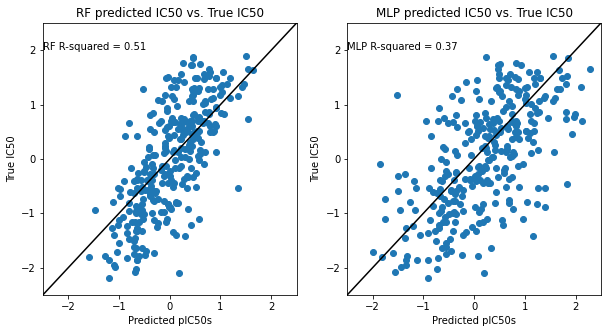

In [68]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(rf_predicted_test, rf_true_test)
plt.xlabel('Predicted pIC50s')
plt.ylabel('True IC50')
plt.title(r'RF predicted IC50 vs. True IC50')
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.plot([-2.5, 2.5], [-2.5, 2.5], color='k')
plt.text(-2.5, 2, 'RF R-squared = %0.2f' % 0.5099)
plt.subplot(1,2,2)
plt.scatter(mlp_predicted_test, rf_true_test)
plt.xlabel('Predicted pIC50s')
plt.ylabel('True IC50')
plt.title(r'MLP predicted IC50 vs. True IC50')
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.plot([-2.5, 2.5], [-2.5, 2.5], color='k')
plt.text(-2.5, 2, 'MLP R-squared = %0.2f' % 0.369)
plt.show()

In [69]:
#chapter 5 completed